In [1]:
!pip install feature-engine==1.8.1 scikit-learn==1.5.1 pandas==2.2.2
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.1/364.1 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 63.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0


In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer , StandardScaler
from sklearn.model_selection import train_test_split , GridSearchCV, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, make_scorer, PrecisionRecallDisplay
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from feature_engine.outliers import Winsorizer

In [32]:
df=pd.read_csv('/content/drive/MyDrive/datasets/eeg_eye_state.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14980 entries, 0 to 14979
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      14980 non-null  float64
 1   V2      14980 non-null  float64
 2   V3      14980 non-null  float64
 3   V4      14980 non-null  float64
 4   V5      14980 non-null  float64
 5   V6      14980 non-null  float64
 6   V7      14980 non-null  float64
 7   V8      14980 non-null  float64
 8   V9      14980 non-null  float64
 9   V10     14980 non-null  float64
 10  V11     14980 non-null  float64
 11  V12     14980 non-null  float64
 12  V13     14980 non-null  float64
 13  V14     14980 non-null  float64
 14  Class   14980 non-null  object 
dtypes: float64(14), object(1)
memory usage: 1.7+ MB


In [33]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
count,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000
mean,4321.917777,4009.767694,4264.022433,4164.946326,4341.741075,4644.022379,4110.400160,4616.056904,4218.826610,4231.316200,4202.456900,4279.232774,4615.205336,4416.435832
std,2492.072174,45.941672,44.428052,5216.404632,34.738821,2924.789537,4600.926543,29.292603,2136.408523,38.050903,37.785981,41.544312,1208.369958,5891.285043
min,1030.770000,2830.770000,1040.000000,2453.330000,2089.740000,2768.210000,2086.150000,4567.180000,1357.950000,1816.410000,3273.330000,2257.950000,86.666700,1366.150000
25%,4280.510000,3990.770000,4250.260000,4108.210000,4331.790000,4611.790000,4057.950000,4604.620000,4190.770000,4220.510000,4190.260000,4267.690000,4590.770000,4342.050000
50%,4294.360000,4005.640000,4262.560000,4120.510000,4338.970000,4617.950000,4070.260000,4613.330000,4199.490000,4229.230000,4200.510000,4276.920000,4603.080000,4354.870000
75%,4311.790000,4023.080000,4270.770000,4132.310000,4347.180000,4626.670000,4083.590000,4624.100000,4209.230000,4239.490000,4211.280000,4287.180000,4617.440000,4372.820000
max,309231.000000,7804.620000,6880.510000,642564.000000,6474.360000,362564.000000,567179.000000,7264.100000,265641.000000,6674.360000,6823.080000,7002.560000,152308.000000,715897.000000


In [34]:
df['Class'].value_counts()

,count
Class,
b'1',8257
b'2',6723


In [35]:
for i in df.columns:
  if df[i].dtype=='float64':
    df[i]=df[i].astype('float32').round(2)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14980 entries, 0 to 14979
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      14980 non-null  float32
 1   V2      14980 non-null  float32
 2   V3      14980 non-null  float32
 3   V4      14980 non-null  float32
 4   V5      14980 non-null  float32
 5   V6      14980 non-null  float32
 6   V7      14980 non-null  float32
 7   V8      14980 non-null  float32
 8   V9      14980 non-null  float32
 9   V10     14980 non-null  float32
 10  V11     14980 non-null  float32
 11  V12     14980 non-null  float32
 12  V13     14980 non-null  float32
 13  V14     14980 non-null  float32
 14  Class   14980 non-null  object 
dtypes: float32(14), object(1)
memory usage: 936.4+ KB


In [36]:
df['Class']=df['Class'].replace({"b'1'": 1, "b'2'": 0}).astype('bool')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14980 entries, 0 to 14979
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      14980 non-null  float32
 1   V2      14980 non-null  float32
 2   V3      14980 non-null  float32
 3   V4      14980 non-null  float32
 4   V5      14980 non-null  float32
 5   V6      14980 non-null  float32
 6   V7      14980 non-null  float32
 7   V8      14980 non-null  float32
 8   V9      14980 non-null  float32
 9   V10     14980 non-null  float32
 10  V11     14980 non-null  float32
 11  V12     14980 non-null  float32
 12  V13     14980 non-null  float32
 13  V14     14980 non-null  float32
 14  Class   14980 non-null  bool   
dtypes: bool(1), float32(14)
memory usage: 834.0 KB


<ipython-input-36-dc96a7aa89ce>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Class']=df['Class'].replace({"b'1'": 1, "b'2'": 0}).astype('bool')


In [37]:
sampled_df=df.sample(2000, ignore_index=True, random_state=(42))
sampled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      2000 non-null   float32
 1   V2      2000 non-null   float32
 2   V3      2000 non-null   float32
 3   V4      2000 non-null   float32
 4   V5      2000 non-null   float32
 5   V6      2000 non-null   float32
 6   V7      2000 non-null   float32
 7   V8      2000 non-null   float32
 8   V9      2000 non-null   float32
 9   V10     2000 non-null   float32
 10  V11     2000 non-null   float32
 11  V12     2000 non-null   float32
 12  V13     2000 non-null   float32
 13  V14     2000 non-null   float32
 14  Class   2000 non-null   bool   
dtypes: bool(1), float32(14)
memory usage: 111.5 KB


In [38]:
sampled_df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,4299.791016,4011.512939,4264.831055,4121.789551,4340.109863,4618.832031,4072.402100,4616.961914,4201.184082,4231.938965,4202.183594,4280.337891,4603.413086,4359.743652
std,82.575394,89.988548,39.698845,42.741787,53.074348,45.253712,23.607157,61.899567,19.685419,57.932072,32.594025,64.119293,106.482185,77.639709
min,1030.770020,3921.540039,4207.689941,2453.330078,2089.739990,2768.209961,3581.540039,4574.870117,4147.689941,4173.330078,4112.310059,4213.850098,86.669998,1366.150024
25%,4281.029785,3991.280029,4250.259766,4108.209961,4331.279785,4611.279785,4057.439941,4604.620117,4190.259766,4220.000000,4189.740234,4267.180176,4590.259766,4342.049805
50%,4294.359863,4005.639893,4262.560059,4120.509766,4338.459961,4617.439941,4070.260010,4613.850098,4199.490234,4229.229980,4200.509766,4276.410156,4603.080078,4354.870117
75%,4311.279785,4022.050049,4270.770020,4132.310059,4346.279907,4626.669922,4084.100098,4624.100098,4208.720215,4239.490234,4210.770020,4287.180176,4617.049927,4371.790039
max,4504.100098,7804.620117,5762.560059,4235.379883,4456.919922,4754.870117,4174.359863,7264.100098,4586.149902,6674.359863,5170.770020,7002.560059,4814.359863,4566.149902


In [39]:
sampled_df.isnull().sum()

,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0
V10,0


In [40]:
sampled_df.duplicated().sum()

0

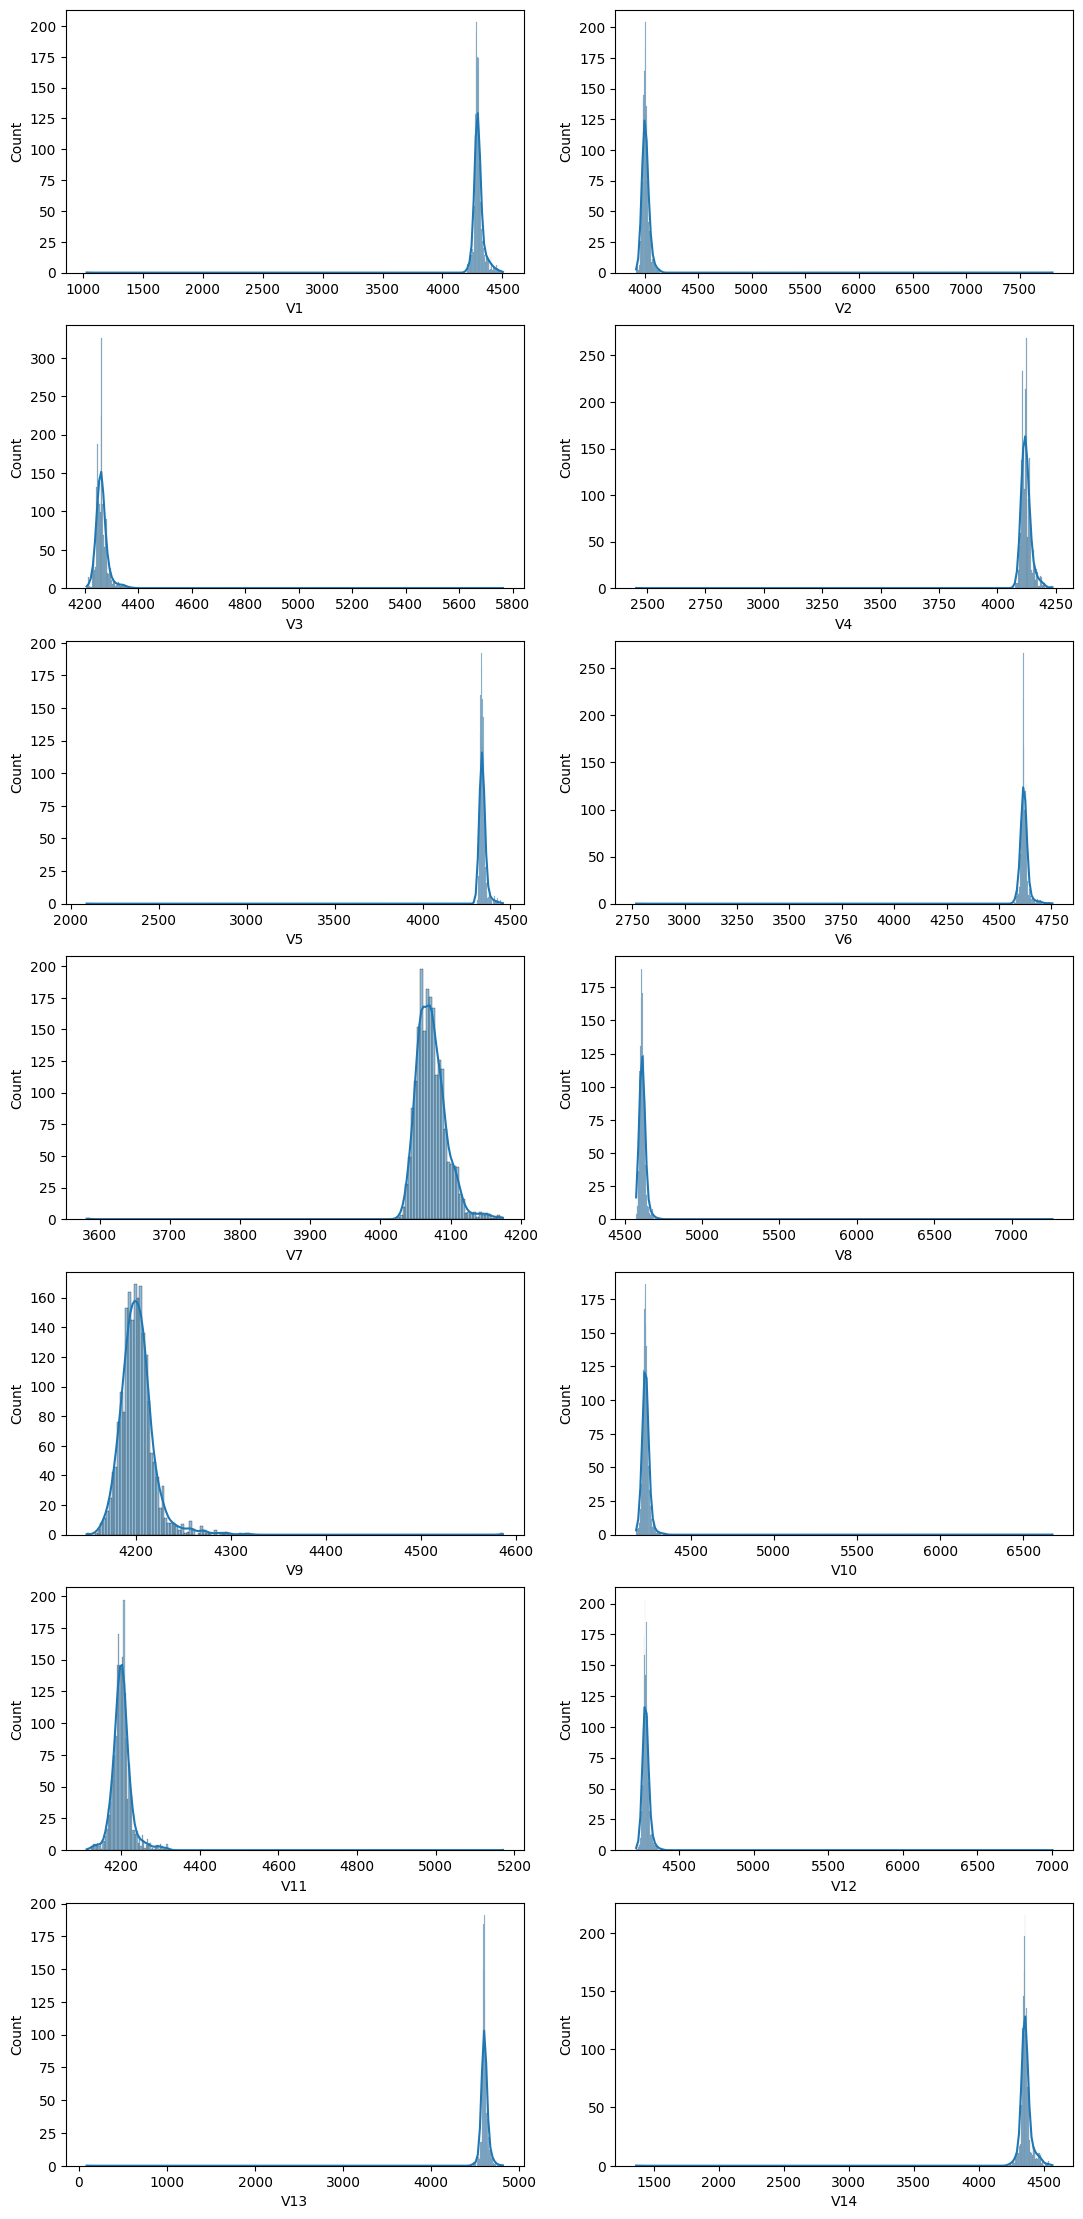

In [41]:
plt.figure(figsize=(13, 28))
plt.subplot(7,2,1)
sns.histplot(sampled_df['V1'], kde=True)
plt.subplot(7,2,2)
sns.histplot(sampled_df['V2'], kde=True)
plt.subplot(7,2,3)
sns.histplot(sampled_df['V3'], kde=True)
plt.subplot(7,2,4)
sns.histplot(sampled_df['V4'], kde=True)
plt.subplot(7,2,5)
sns.histplot(sampled_df['V5'], kde=True)
plt.subplot(7,2,6)
sns.histplot(sampled_df['V6'], kde=True)
plt.subplot(7,2,7)
sns.histplot(sampled_df['V7'], kde=True)
plt.subplot(7,2,8)
sns.histplot(sampled_df['V8'], kde=True)
plt.subplot(7,2,9)
sns.histplot(sampled_df['V9'], kde=True)
plt.subplot(7,2,10)
sns.histplot(sampled_df['V10'], kde=True)
plt.subplot(7,2,11)
sns.histplot(sampled_df['V11'], kde=True)
plt.subplot(7,2,12)
sns.histplot(sampled_df['V12'], kde=True)
plt.subplot(7,2,13)
sns.histplot(sampled_df['V13'], kde=True)
plt.subplot(7,2,14)
sns.histplot(sampled_df['V14'], kde=True)
plt.show()

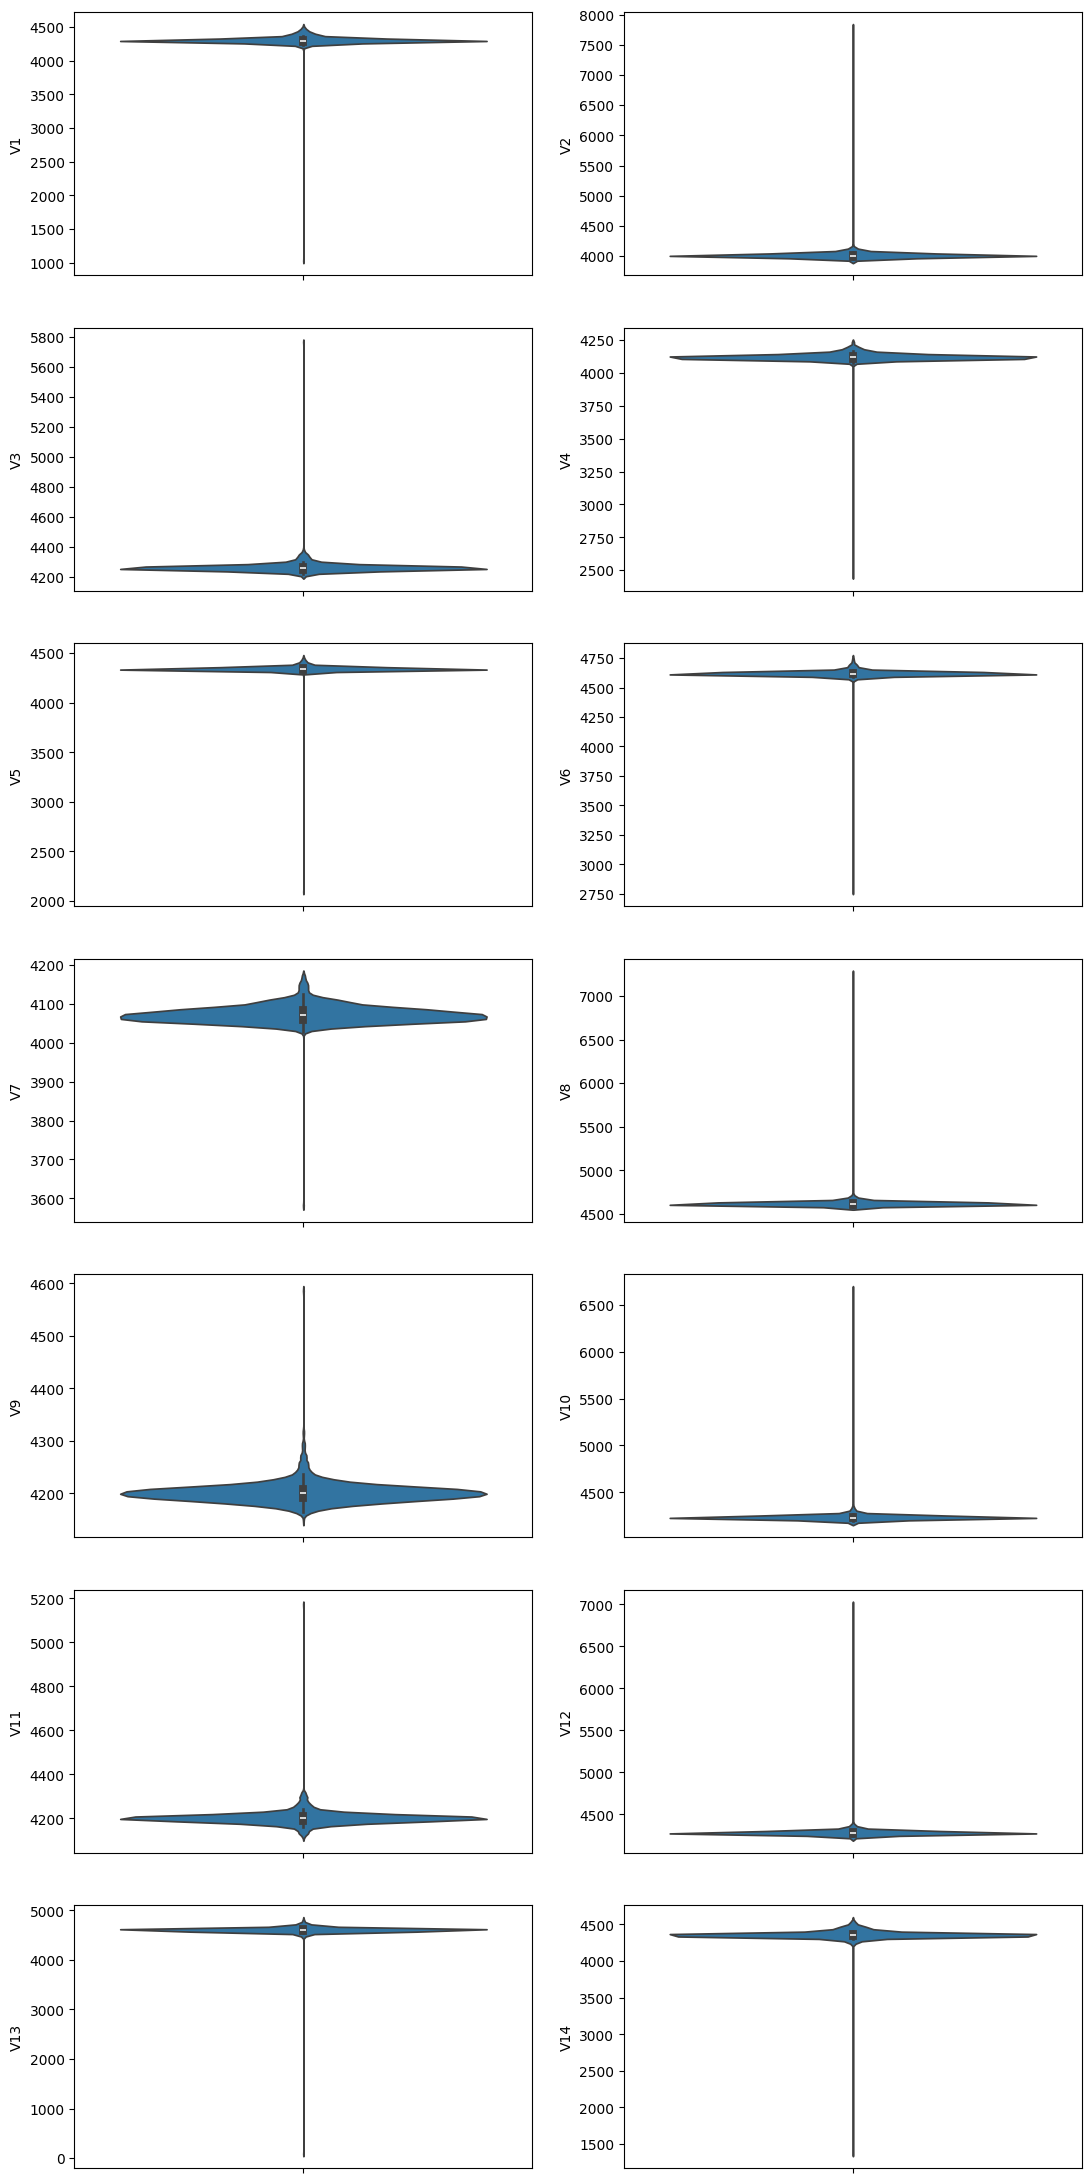

In [42]:
plt.figure(figsize=(13, 28))
plt.subplot(7,2,1)
sns.violinplot(sampled_df['V1'])
plt.subplot(7,2,2)
sns.violinplot(sampled_df['V2'])
plt.subplot(7,2,3)
sns.violinplot(sampled_df['V3'])
plt.subplot(7,2,4)
sns.violinplot(sampled_df['V4'])
plt.subplot(7,2,5)
sns.violinplot(sampled_df['V5'])
plt.subplot(7,2,6)
sns.violinplot(sampled_df['V6'])
plt.subplot(7,2,7)
sns.violinplot(sampled_df['V7'])
plt.subplot(7,2,8)
sns.violinplot(sampled_df['V8'])
plt.subplot(7,2,9)
sns.violinplot(sampled_df['V9'])
plt.subplot(7,2,10)
sns.violinplot(sampled_df['V10'])
plt.subplot(7,2,11)
sns.violinplot(sampled_df['V11'])
plt.subplot(7,2,12)
sns.violinplot(sampled_df['V12'])
plt.subplot(7,2,13)
sns.violinplot(sampled_df['V13'])
plt.subplot(7,2,14)
sns.violinplot(sampled_df['V14'])
plt.show()

In [43]:
# Initialize the QuantileTransformer
quantile_transformer = QuantileTransformer(output_distribution='normal')

# Apply the transformation
# Fit the transformer and transform the data
transformed_data = quantile_transformer.fit_transform(sampled_df.drop(['Class'], axis=1))

# Convert the result back to a DataFrame
q_transformed_df = pd.DataFrame(transformed_data, columns=sampled_df.drop(['Class'], axis=1).columns)
# q_transformed_df['Class']= sampled_df['Class']

# Display the transformed DataFrame
print(q_transformed_df)

            V1        V2        V3        V4        V5        V6        V7  \
0    -0.500651 -0.595437  0.293986 -0.089193 -1.649237 -0.963423 -0.979511   
1    -0.781626 -0.790168 -0.443149 -1.040089 -0.631785 -1.798663 -2.196894   
2    -0.500651 -0.406079  0.352151  0.158740 -0.417002 -0.462610 -0.935852   
3    -2.170090  0.689529 -2.456904 -1.104747 -0.797044 -0.408805 -0.372246   
4    -1.072973 -0.790168 -1.460531 -0.969427 -0.168912 -1.244778 -1.104747   
...        ...       ...       ...       ...       ...       ...       ...   
1995  0.678433  1.231280  0.601439  1.179402  0.209787 -2.033513  0.778225   
1996  0.010037 -1.225943 -0.882739 -1.865852  0.106841  0.282216 -0.168912   
1997 -1.384628 -0.364191 -0.824933  0.001255  0.759677  0.057742  0.267884   
1998  0.085414 -1.482760 -0.608973 -2.575483 -1.181921 -0.683178  1.231280   
1999 -0.823172 -0.667419  0.077862  0.101796 -1.786156 -1.064091 -2.326348   

            V8        V9       V10       V11       V12       V1

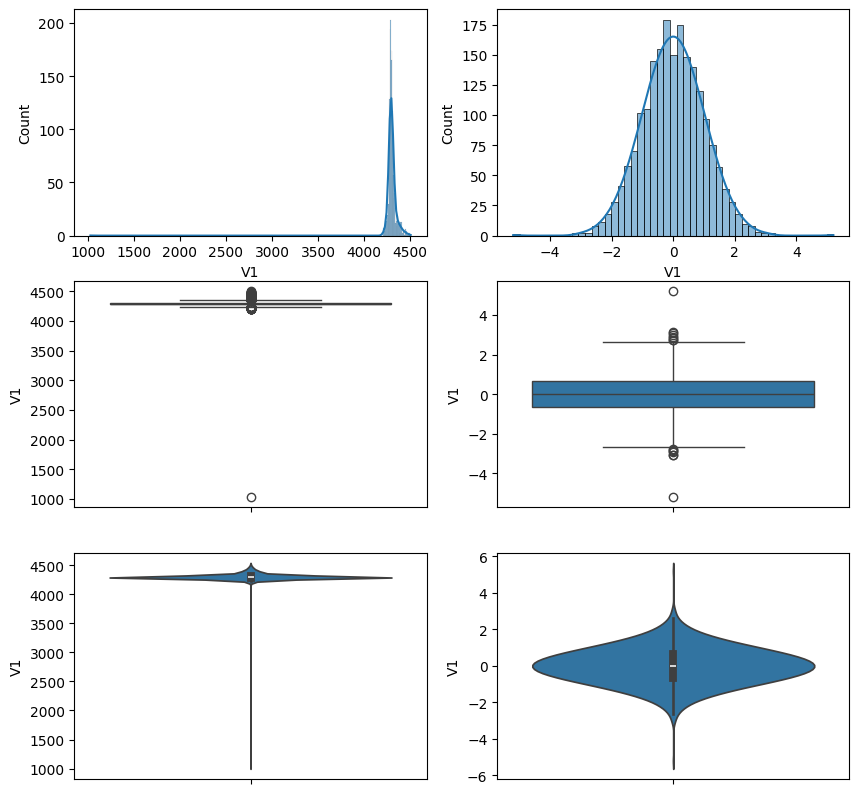

In [44]:
plt.figure(figsize= (10, 10))
plt.subplot(3, 2, 1)
sns.histplot(sampled_df['V1'], kde=True)
plt.subplot(3, 2, 2)
sns.histplot(q_transformed_df['V1'], kde=True)
plt.subplot(3, 2, 3)
sns.boxplot(sampled_df['V1'])
plt.subplot(3, 2, 4)
sns.boxplot(q_transformed_df['V1'])
plt.subplot(3, 2, 5)
sns.violinplot(sampled_df['V1'])
plt.subplot(3, 2, 6)
sns.violinplot(q_transformed_df['V1'])
plt.show()

In [45]:
# Create a Winsorizer instance
winsorizer = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=[f'V{i}' for i in range(1, 15)])

# Fit and transform the data
sampled_df_winsorized = winsorizer.fit_transform(q_transformed_df)

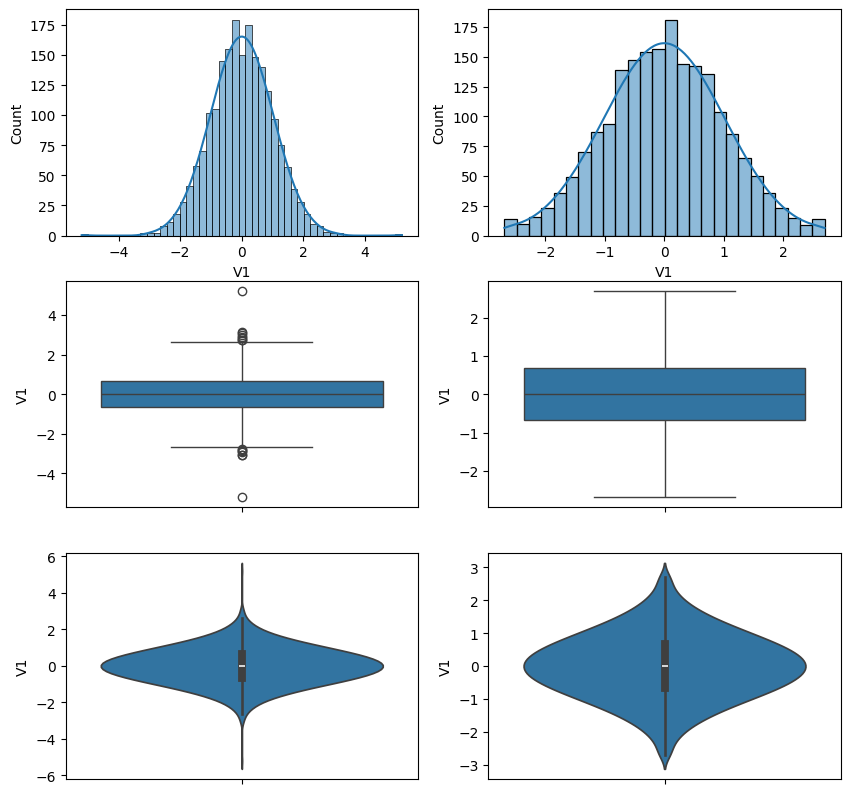

In [46]:
plt.figure(figsize= (10, 10))
plt.subplot(3, 2, 1)
sns.histplot(q_transformed_df['V1'], kde=True)
plt.subplot(3, 2, 2)
sns.histplot(sampled_df_winsorized['V1'], kde=True)
plt.subplot(3, 2, 3)
sns.boxplot(q_transformed_df['V1'])
plt.subplot(3, 2, 4)
sns.boxplot(sampled_df_winsorized['V1'])
plt.subplot(3, 2, 5)
sns.violinplot(q_transformed_df['V1'])
plt.subplot(3, 2, 6)
sns.violinplot(sampled_df_winsorized['V1'])
plt.show()

In [47]:
sampled_df_winsorized.skew().round(5)

,0
V1,0.00086
V2,-0.00083
V3,-0.00216
V4,-0.00148
V5,-0.00227
V6,-0.00153
V7,-0.00340
V8,-0.00307
V9,-0.00356
V10,-0.00073


In [48]:
sampled_df_winsorized.kurt()

,0
V1,-0.153923
V2,-0.159788
V3,-0.145759
V4,-0.149778
V5,-0.153283
V6,-0.128853
V7,-0.140890
V8,-0.138659
V9,-0.154871
V10,-0.133995


In [49]:
sampled_df_winsorized.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2.000000e+03
mean,0.000012,-0.000062,-0.000211,-0.000141,-0.000165,-0.000144,-0.000204,-0.000234,-0.000265,-0.000065,-0.000006,-0.000037,-0.000075,6.362111e-07
std,0.995797,0.995684,0.996316,0.996219,0.995948,0.997208,0.996859,0.996805,0.995967,0.997080,0.995454,0.997575,0.996789,9.961836e-01
min,-2.690117,-2.672029,-2.707417,-2.705867,-2.701613,-2.744626,-2.734555,-2.734299,-2.688566,-2.731208,-2.672824,-2.770070,-2.741779,-2.709822e+00
25%,-0.668987,-0.667419,-0.676854,-0.680013,-0.683178,-0.683178,-0.694311,-0.684763,-0.676854,-0.676854,-0.665852,-0.694311,-0.692715,-6.815943e-01
50%,0.010037,0.001255,0.011291,0.001255,0.016310,-0.007527,0.008782,0.015055,-0.010037,-0.005018,0.003764,-0.006273,-0.007527,5.018293e-03
75%,0.678433,0.668987,0.676854,0.670557,0.662446,0.691121,0.665852,0.681594,0.664287,0.692715,0.672129,0.689529,0.673328,6.705573e-01
max,2.699563,2.673597,2.707417,2.696412,2.680881,2.752569,2.706096,2.731131,2.675999,2.747069,2.679101,2.765288,2.722392,2.698785e+00


In [50]:
st_scaler=StandardScaler()
scaled_X=st_scaler.fit_transform(sampled_df_winsorized)

In [51]:
scaled_X.round(2)

array([[-0.5 , -0.6 ,  0.3 , ..., -0.5 , -0.94, -0.77],
       [-0.79, -0.79, -0.44, ..., -1.43, -0.7 , -0.6 ],
       [-0.5 , -0.41,  0.35, ..., -1.5 , -0.72, -0.68],
       ...,
       [-1.39, -0.37, -0.83, ..., -1.62,  0.13, -1.21],
       [ 0.09, -1.49, -0.61, ...,  0.79,  0.13,  0.29],
       [-0.83, -0.67,  0.08, ..., -0.78, -0.22, -0.96]])

In [52]:
df_scaled=pd.DataFrame(scaled_X, columns=[f'V{i}' for i in range(1, 15)])
df_scaled['Class']=sampled_df['Class']
df_scaled.describe().round(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
count,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00
mean,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.70,-2.68,-2.72,-2.72,-2.71,-2.75,-2.74,-2.74,-2.70,-2.74,-2.69,-2.78,-2.75,-2.72
25%,-0.67,-0.67,-0.68,-0.68,-0.69,-0.69,-0.70,-0.69,-0.68,-0.68,-0.67,-0.70,-0.70,-0.68
50%,0.01,0.00,0.01,0.00,0.02,-0.01,0.01,0.02,-0.01,-0.00,0.00,-0.01,-0.01,0.01
75%,0.68,0.67,0.68,0.67,0.67,0.69,0.67,0.68,0.67,0.69,0.68,0.69,0.68,0.67
max,2.71,2.69,2.72,2.71,2.69,2.76,2.72,2.74,2.69,2.76,2.69,2.77,2.73,2.71


In [53]:
df_scaled.skew().round(5)

,0
V1,0.00086
V2,-0.00083
V3,-0.00216
V4,-0.00148
V5,-0.00227
V6,-0.00153
V7,-0.00340
V8,-0.00307
V9,-0.00356
V10,-0.00073


In [54]:
df_scaled.kurt().round(2)

,0
V1,-0.15
V2,-0.16
V3,-0.15
V4,-0.15
V5,-0.15
V6,-0.13
V7,-0.14
V8,-0.14
V9,-0.15
V10,-0.13


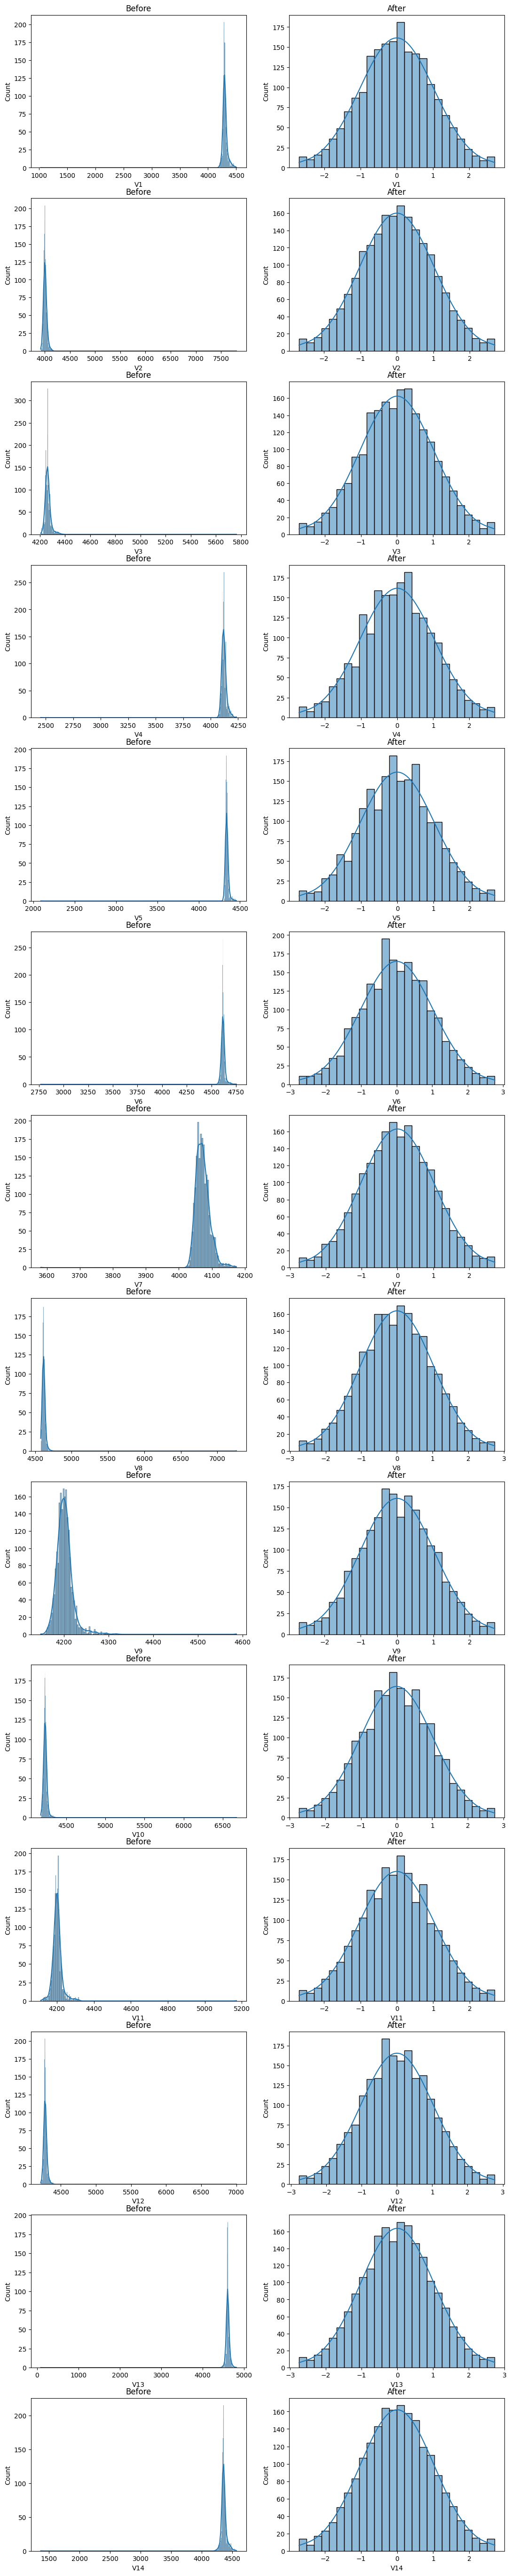

In [55]:
plt.figure(figsize=(13, 70))
plt.subplot(14, 2, 1)
sns.histplot(sampled_df['V1'], kde=True)
plt.title('Before')
plt.subplot(14, 2, 2)
sns.histplot(df_scaled['V1'], kde=True)
plt.title('After')
plt.subplot(14, 2, 3)
sns.histplot(sampled_df['V2'], kde=True)
plt.title('Before')
plt.subplot(14, 2, 4)
sns.histplot(df_scaled['V2'], kde=True)
plt.title('After')
plt.subplot(14, 2, 5)
sns.histplot(sampled_df['V3'], kde=True)
plt.title('Before')
plt.subplot(14, 2, 6)
sns.histplot(df_scaled['V3'], kde=True)
plt.title('After')
plt.subplot(14, 2, 7)
sns.histplot(sampled_df['V4'], kde=True)
plt.title('Before')
plt.subplot(14, 2, 8)
sns.histplot(df_scaled['V4'], kde=True)
plt.title('After')
plt.subplot(14, 2, 9)
sns.histplot(sampled_df['V5'], kde=True)
plt.title('Before')
plt.subplot(14, 2, 10)
sns.histplot(df_scaled['V5'], kde=True)
plt.title('After')
plt.subplot(14, 2, 11)
sns.histplot(sampled_df['V6'], kde=True)
plt.title('Before')
plt.subplot(14, 2, 12)
sns.histplot(df_scaled['V6'], kde=True)
plt.title('After')
plt.subplot(14, 2, 13)
sns.histplot(sampled_df['V7'], kde=True)
plt.title('Before')
plt.subplot(14, 2, 14)
sns.histplot(df_scaled['V7'], kde=True)
plt.title('After')
plt.subplot(14, 2, 15)
sns.histplot(sampled_df['V8'], kde=True)
plt.title('Before')
plt.subplot(14, 2, 16)
sns.histplot(df_scaled['V8'], kde=True)
plt.title('After')
plt.subplot(14, 2, 17)
sns.histplot(sampled_df['V9'], kde=True)
plt.title('Before')
plt.subplot(14, 2, 18)
sns.histplot(df_scaled['V9'], kde=True)
plt.title('After')
plt.subplot(14, 2, 19)
sns.histplot(sampled_df['V10'], kde=True)
plt.title('Before')
plt.subplot(14, 2, 20)
sns.histplot(df_scaled['V10'], kde=True)
plt.title('After')
plt.subplot(14, 2, 21)
sns.histplot(sampled_df['V11'], kde=True)
plt.title('Before')
plt.subplot(14, 2, 22)
sns.histplot(df_scaled['V11'], kde=True)
plt.title('After')
plt.subplot(14, 2, 23)
sns.histplot(sampled_df['V12'], kde=True)
plt.title('Before')
plt.subplot(14, 2, 24)
sns.histplot(df_scaled['V12'], kde=True)
plt.title('After')
plt.subplot(14, 2, 25)
sns.histplot(sampled_df['V13'], kde=True)
plt.title('Before')
plt.subplot(14, 2, 26)
sns.histplot(df_scaled['V13'], kde=True)
plt.title('After')
plt.subplot(14, 2, 27)
sns.histplot(sampled_df['V14'], kde=True)
plt.title('Before')
plt.subplot(14, 2, 28)
sns.histplot(df_scaled['V14'], kde=True)
plt.title('After')
plt.show()

In [56]:
df_scaled.corr()['Class'].sort_values()

,Class
V14,-0.164373
V1,-0.139447
V13,-0.128860
V12,-0.128130
V10,-0.106961
V3,-0.089284
V11,-0.078471
V8,-0.062319
V9,-0.046241
V7,0.011926


<Axes: >

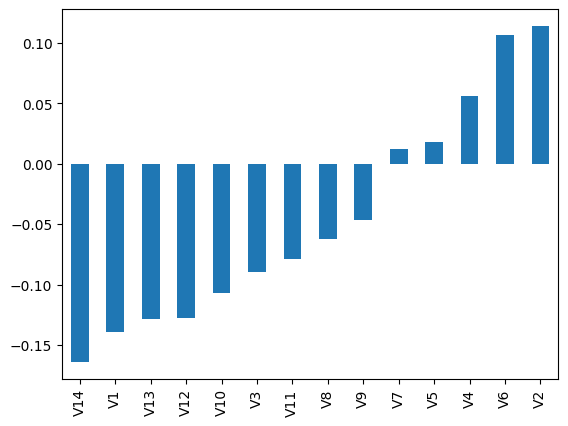

In [57]:
df_scaled.corr()['Class'][:-1].sort_values().plot(kind='bar')

In [58]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(df_scaled.drop(['Class'], axis=1), sampled_df['Class'], test_size=.2, shuffle=False)

In [59]:
svm_classifier=SVC()

# Set up the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 5, 8, 10, 11, 15, 20, 25, 50, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel types
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid,
                           scoring='accuracy', cv=10, verbose=1, n_jobs=-1)

# Fit the model
grid_search.fit(Xtrain, Ytrain)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best Cross-Validation Score: {best_score:.2f}')

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
Ypred = best_model.predict(Xtest)
test_accuracy = accuracy_score(Ytest, Ypred)

print(f'Test Accuracy: {test_accuracy:.2f}')

Fitting 10 folds for each of 66 candidates, totalling 660 fits
Best Parameters: {'C': 8, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validation Score: 0.91
Test Accuracy: 0.90


In [60]:
svm_classifier2=SVC(C=20, gamma= 'scale', kernel='rbf')
Xtrain, Xtest, Ytrain, Ytest = train_test_split(df_scaled.drop(['Class'], axis=1), sampled_df['Class'], test_size=.2, shuffle=False)

In [61]:
svm_classifier2.fit(Xtrain, Ytrain)

SVC(C=20)

In [62]:
Ypred2=svm_classifier2.predict(Xtest)
acc2=accuracy_score(Ypred2, Ytest)
acc2

0.9225

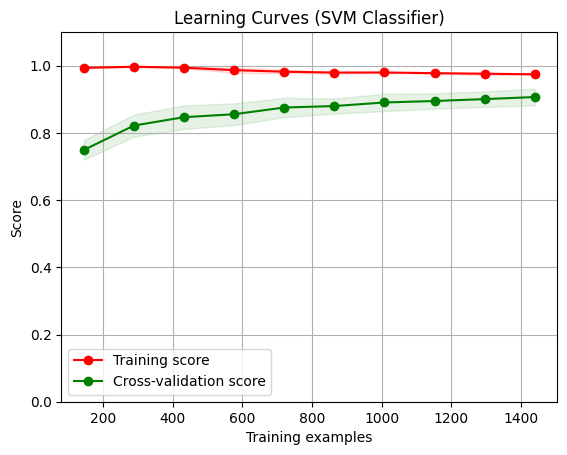

In [63]:
# Setting parameters for the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    svm_classifier2, Xtrain, Ytrain, train_sizes=np.linspace(0.1, 1.0, 10), cv=10, scoring=make_scorer(accuracy_score)
)

# Calculate the mean and std deviation of training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotting the learning curves
plt.figure()
plt.title("Learning Curves (SVM Classifier)")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.ylim(0, 1.1)  # Adjust the y-axis limit if necessary
plt.grid()

# Plot the average training score and fill between std deviation
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")

# Plot the average test score and fill between std deviation
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.legend(loc="best")
plt.show()

In [64]:
# Predict on the training set
Ytrain_pred = svm_classifier2.predict(Xtrain)
# Predict on the test set
Ytest_pred = svm_classifier2.predict(Xtest)

# Calculate the accuracy on the training and test sets
train_accuracy = accuracy_score(Ytrain, Ytrain_pred)
test_accuracy = accuracy_score(Ytest, Ytest_pred)

# Calculate precision, recall, and F1 score
train_precision = precision_score(Ytrain, Ytrain_pred, average='weighted', zero_division=0)
test_precision = precision_score(Ytest, Ytest_pred, average='weighted', zero_division=0)

train_recall = recall_score(Ytrain, Ytrain_pred, average='weighted', zero_division=0)
test_recall = recall_score(Ytest, Ytest_pred, average='weighted', zero_division=0)

train_f1 = f1_score(Ytrain, Ytrain_pred, average='weighted', zero_division=0)
test_f1 = f1_score(Ytest, Ytest_pred, average='weighted', zero_division=0)

# Print the results
print("Performance on Training Data:")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Training Precision: {train_precision:.4f}")
print(f"Training Recall: {train_recall:.4f}")
print(f"Training F1 Score: {train_f1:.4f}")

print("\nPerformance on Test Data:")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(Ytest, Ytest_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification Report
print("\nClassification Report:")
print(classification_report(Ytest, Ytest_pred))

Performance on Training Data:
Training Accuracy: 0.9725
Training Precision: 0.9725
Training Recall: 0.9725
Training F1 Score: 0.9725

Performance on Test Data:
Test Accuracy: 0.9225
Test Precision: 0.9225
Test Recall: 0.9225
Test F1 Score: 0.9225

Confusion Matrix:
[[171  17]
 [ 14 198]]

Classification Report:
              precision    recall  f1-score   support

       False       0.92      0.91      0.92       188
        True       0.92      0.93      0.93       212

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



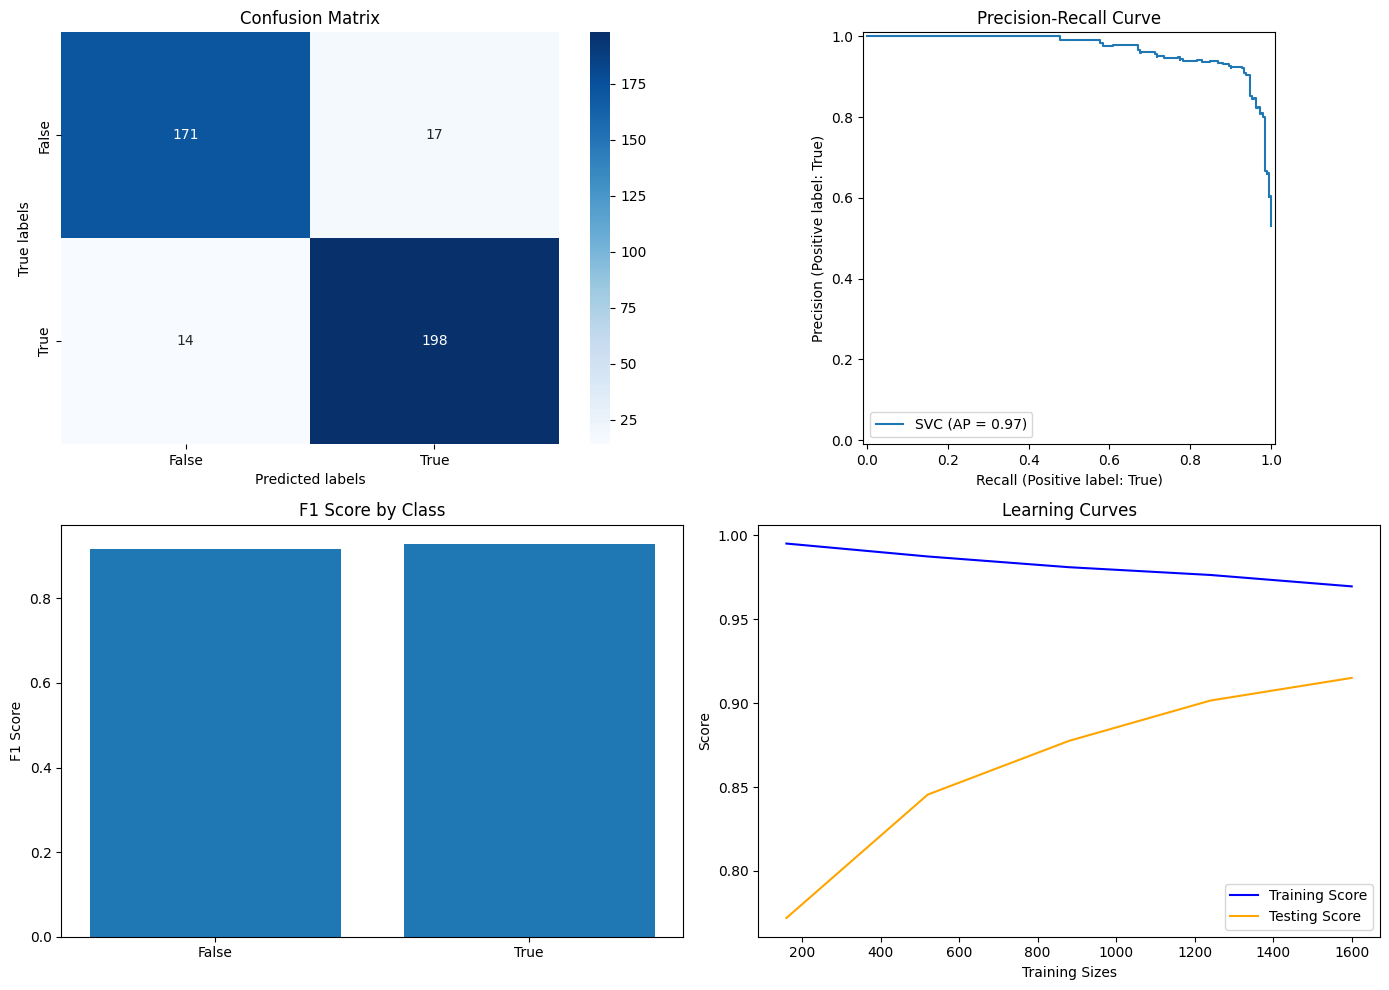

In [65]:
# Calculate various metrics
train_accuracy = accuracy_score(Ytrain, Ytrain_pred)
test_accuracy = accuracy_score(Ytest, Ytest_pred)

train_f1 = f1_score(Ytrain, Ytrain_pred, average='weighted', zero_division=0)
test_f1 = f1_score(Ytest, Ytest_pred, average='weighted', zero_division=0)

# Confusion Matrix
conf_matrix = confusion_matrix(Ytest, Ytest_pred)

# Classification Report
report = classification_report(Ytest, Ytest_pred, output_dict=True)

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# 1. Confusion Matrix Heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axs[0, 0])
axs[0, 0].set_title('Confusion Matrix')
axs[0, 0].set_xlabel('Predicted labels')
axs[0, 0].set_ylabel('True labels')
axs[0, 0].set_xticklabels(['False', 'True'])
axs[0, 0].set_yticklabels(['False', 'True'])

# 2. Precision-Recall Curve
PrecisionRecallDisplay.from_estimator(svm_classifier2, Xtest, Ytest, ax=axs[0, 1])
axs[0, 1].set_title('Precision-Recall Curve')

# 3. F1 Score Bar Plot
axs[1, 0].bar(['False', 'True'], [report['False']['f1-score'], report['True']['f1-score']])
axs[1, 0].set_title('F1 Score by Class')
axs[1, 0].set_ylabel('F1 Score')

# 4. Learning Curves
train_sizes, train_scores, test_scores = learning_curve(svm_classifier2, df_scaled.drop(['Class'], axis=1), sampled_df['Class'], cv=5)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

axs[1, 1].plot(train_sizes, train_mean, label='Training Score', color='blue')
axs[1, 1].plot(train_sizes, test_mean, label='Testing Score', color='orange')
axs[1, 1].set_title('Learning Curves')
axs[1, 1].set_xlabel('Training Sizes')
axs[1, 1].set_ylabel('Score')
axs[1, 1].legend()

plt.tight_layout()
plt.show()